### 히스토그램(histogram)
: 단위 컬럼의 데이터 빈도수를 그래프로 표현 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


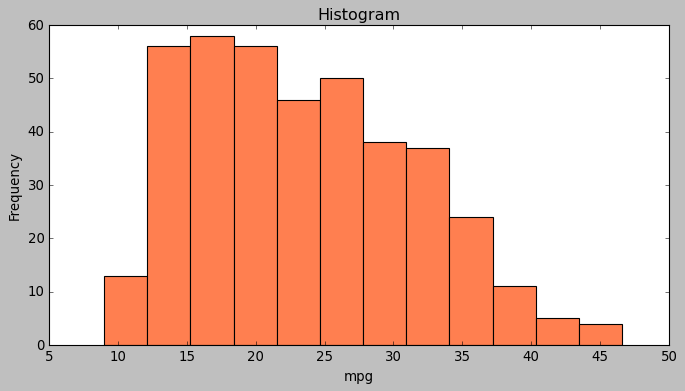

In [6]:
# histogram

plt.style.use('classic')

df.mpg.plot(
    kind='hist',
    bins = 12, # default : 10
    color = 'coral',
    figsize=(10, 5)
)

plt.title("Histogram")
plt.xlabel('mpg')

plt.show()

> 자동차의 연비값은 대부분 좌측으로 편향되어 있어서 연비가 낮은 구간에 집중되어 있는 경향을 보인다. 

---
### 산점도(산포도, Scatter)
: 서로 다른 두개의 데이터 사이의 관계를 나타낸다.

In [7]:
# 상관 계수
import numpy as np

np.corrcoef(df.mpg, df.weight)

array([[ 1.        , -0.83174093],
       [-0.83174093,  1.        ]])

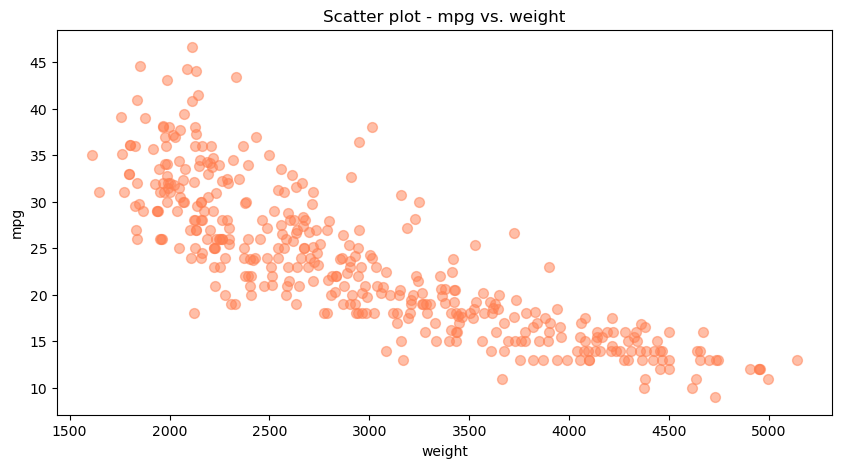

In [10]:
# 연비(mpg)와 차중(weight)에 대한 산점도 그리기

plt.style.use('default')

df.plot(
    kind='scatter',
    x='weight',
    y='mpg',
    color='coral',
    figsize=(10,5),
    s=50,
    alpha=0.5
)

plt.title("Scatter plot - mpg vs. weight")

plt.show()

> 자동차의 무게와 연비사이의 관계를 산점도로 표현.      
자동차의 무게가 높을수록 연비는 낮아지는 역상관을 표현하고 있다.   

---
### 버블(Bubble) 차트
: 산점도 각점의 크기에 특정 데이터로 크기를 결정한다.

In [12]:
# Cylinder 개수의 상대적 비율을 계산 (데이터의 정규화(Normalization))
df.cylinders.unique()
cylinder_size = df.cylinders / df.cylinders.max() * 100
cylinder_size

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
       ...  
393     50.0
394     50.0
395     50.0
396     50.0
397     50.0
Name: cylinders, Length: 398, dtype: float64

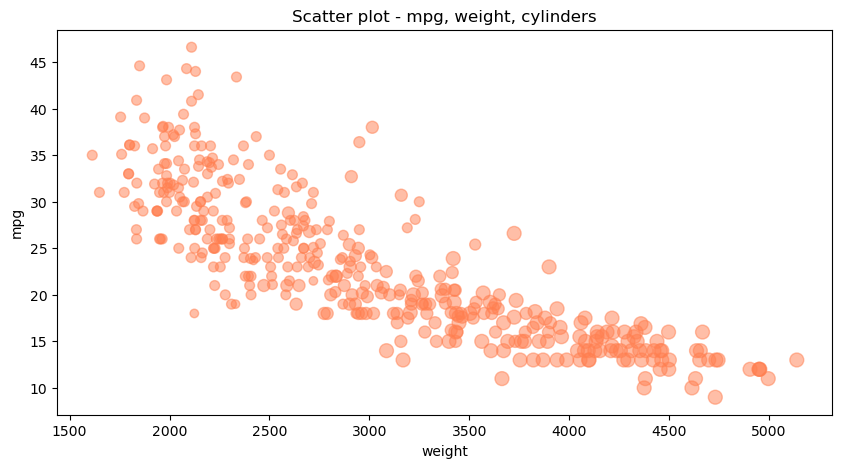

In [13]:
# 연비(mpg)와 차중(weight), 실린더(cylinders)에 대한 버블차트 그리기

plt.style.use('default')

df.plot(
    kind='scatter',
    x='weight',
    y='mpg',
    color='coral',
    figsize=(10,5),
    s=cylinder_size,
    alpha=0.5
)

plt.title("Scatter plot - mpg, weight, cylinders")

plt.show()

### 실린더 크기를 컬러로 변경 및 파일로 저장

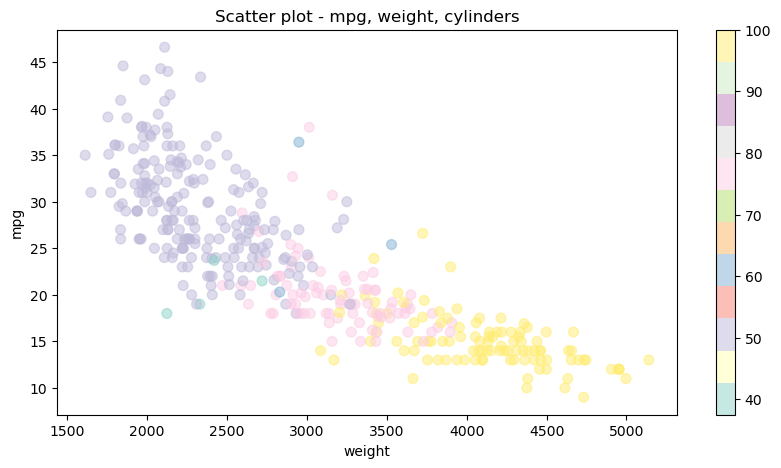

In [24]:
# 연비(mpg)와 차중(weight), 실린더(cylinders)에 대한 컬러별 차트 그리기

plt.style.use('default')

df.plot(
    kind='scatter',
    x='weight',
    y='mpg',
    marker = "o",
    cmap = "Set3",
    figsize=(10,5),
    c=cylinder_size,
    s=50,
    alpha=0.5,
)

plt.title("Scatter plot - mpg, weight, cylinders")
plt.savefig("../Data/scatter.png")
plt.savefig("../Data/scatter_t.png", transparent=True)

plt.show()

----
### 파이차트(Pie Chart)
- 원을 파이처럼 나누어서 표현
- 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례하는 비율값

#### 자동차의 국가별 데이터 갯수를 파이차트로 표현

In [26]:
df.origin.unique()

array([1, 3, 2], dtype=int64)

In [ ]:
print(len(df[df.origin == 1]))


249


In [38]:
sr_nation = pd.Series([
                (df.origin == 1).sum(),
                (df.origin == 2).sum(),
                (df.origin == 3).sum()
            ])
sr_nation

0    249
1     70
2     79
dtype: int64

In [39]:
# index에 국가명 넣기
sr_nation.index = ['USA', 'EU', 'JAPAN']
sr_nation

USA      249
EU        70
JAPAN     79
dtype: int64

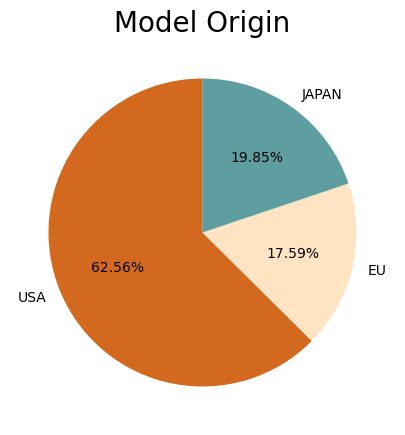

In [45]:
# Pie Chart 그리기

sr_nation.plot(
    kind='pie',
    figsize=(7,5),
    autopct="%.2f%%",
    startangle = 90,
    colors = ['chocolate', 'bisque', 'cadetblue']
)

plt.title("Model Origin", size=20)
plt.show()

---
### 박스플롯
- 데이터의 분포 파악
- 이상치 데이터 확인

In [46]:
import koreanize_matplotlib

C:\Users\tj\AppData\Local\Temp\ipykernel_17644\1057506579.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(
C:\Users\tj\AppData\Local\Temp\ipykernel_17644\1057506579.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(


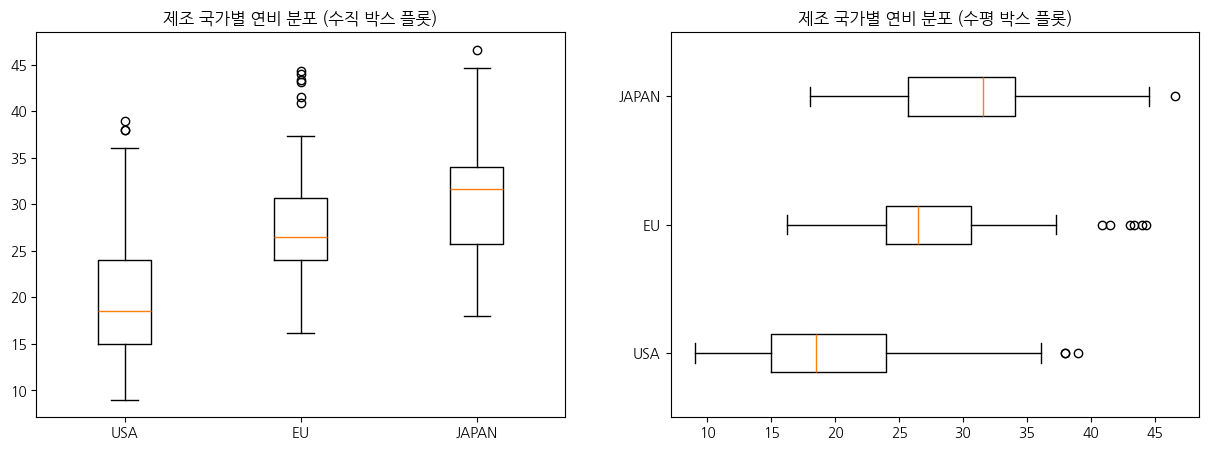

In [51]:
# 1) 제조 국가별 연비 분포 (수직 박스 플롯)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(
    x=[
        df[df.origin == 1].mpg,
        df[df.origin == 2].mpg,
        df[df.origin == 3].mpg,
    ],
    labels = ['USA', 'EU', 'JAPAN']
)
ax1.set_title('제조 국가별 연비 분포 (수직 박스 플롯)')

# 2) 제조 국가별 연비 분포 (수평 박스 플롯)
ax2.boxplot(
    x=[
        df[df.origin == 1].mpg,
        df[df.origin == 2].mpg,
        df[df.origin == 3].mpg,
    ],
    labels = ['USA', 'EU', 'JAPAN'],
    vert=False
)
ax2.set_title('제조 국가별 연비 분포 (수평 박스 플롯)')


plt.show()

